Let's begin by importing pandas. It is conventional to use pd to denote pandas

In [2]:
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames, engine='python', encoding='ISO-8859-1')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames, engine='python', encoding='ISO-8859-1')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None, names=mnames, engine='python', encoding='ISO-8859-1')

data = pd.merge(pd.merge(ratings, users), movies)

Q1. An aggregate on the number of rating done for each particular genre

In [4]:
data.groupby(['genres']).count()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title
genres,,,,,,,,,
Action,12311,12311,12311,12311,12311,12311,12311,12311,12311
Action|Adventure,10446,10446,10446,10446,10446,10446,10446,10446,10446
Action|Adventure|Animation,345,345,345,345,345,345,345,345,345
Action|Adventure|Animation|Children's|Fantasy,135,135,135,135,135,135,135,135,135
Action|Adventure|Animation|Horror|Sci-Fi,618,618,618,618,618,618,618,618,618
...,...,...,...,...,...,...,...,...,...
Sci-Fi|Thriller|War,280,280,280,280,280,280,280,280,280
Sci-Fi|War,1367,1367,1367,1367,1367,1367,1367,1367,1367
Thriller,17851,17851,17851,17851,17851,17851,17851,17851,17851


Q2. The top 5 ranked genres by women on most number of rating

In [5]:
genre_ratings = data.set_index(data.columns.drop('genres',1).tolist()).genres.str.split('|', expand=True).stack().reset_index().rename(columns={0:'genres'}).loc[:, data.columns]
genres = genre_ratings.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')
genres[:10]

gender,F,M
genres,,
Action,3.490252,3.491386
Adventure,3.512879,3.468125
Animation,3.744702,3.661335
Children's,3.572548,3.358961
Comedy,3.571938,3.503667
Crime,3.689332,3.713720
Documentary,3.946392,3.928811
Drama,3.765662,3.766589
Fantasy,3.513076,3.426603


In [6]:
female_top = genres['F'].sort_values(ascending=False)
female_top[:5]

genres
Film-Noir      4.018087
Documentary    3.946392
War            3.893138
Musical        3.809108
Drama          3.765662
Name: F, dtype: float64

Q3. The top 5 ranked genres by men on most number of rating

In [7]:
male_top = genres['M'].sort_values(ascending=False)
male_top[:5]

genres
Film-Noir      4.092254
Documentary    3.928811
War            3.893375
Drama          3.766589
Crime          3.713720
Name: M, dtype: float64

Q4. Pick a genre of your choice and provide average movie’s ratings by the following
four time intervals

(a) 1970 to 1979

In [8]:
data['title']=data['title'].str.slice(-5,-1).astype('int')
interval1=data.loc[(data["genres"] == "Drama") & (data["title"] >= 1970) & (data["title"] <= 1979)]
interval1["rating"].mean()

3.9167029458714264

(b) 1980 to 1989

In [9]:
interval2=data.loc[(data["genres"] == "Drama") & (data["title"] >= 1980) & (data["title"] <= 1989)]
interval2["rating"].mean()

3.775669352742397

 (c) 1990 to 1999

In [10]:
interval3=data.loc[(data["genres"] == "Drama") & (data["title"] >= 1990) & (data["title"] <= 1999)]
interval3["rating"].mean()

3.7056136079801445

(d) 2000 to 2009

In [11]:
interval4=data.loc[(data["genres"] == "Drama") & (data["title"] >= 2000) & (data["title"] <= 2009)]
interval4["rating"].mean()

3.626737427343947

Q5. A function that given a genre and a rating_range (i.e. [3.5, 4]), returns all
the movies of that genre and within that rating range sorted by average rating

In [13]:
def select_by_genre_and_rating(genre,rating_range):
    rating_range = rating_range.lstrip ("[").rstrip ("]")
    lower = float(rating_range.split(",")[0])
    upper = float(rating_range.split(",")[1])
    data["rating"] = data["rating"].astype(float)
    movies = data.loc[(data["genres"] == genre) & (data["rating"] >= lower) & (data["rating"] <= upper)]
    return movies

In [14]:
# choose Comedy genre within the rating range[3.5, 4], show all movies meeting the requirements
select_by_genre_and_rating('Comedy','[3.5,4]')

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
14386,1,2918,4.0,978302124,F,1,10,48067,1986,Comedy
14389,19,2918,4.0,982190563,M,1,10,48073,1986,Comedy
14390,22,2918,4.0,978134977,M,18,15,53706,1986,Comedy
14391,24,2918,4.0,978132276,F,25,7,10023,1986,Comedy
14397,36,2918,4.0,978063380,M,25,3,94123,1986,Comedy
...,...,...,...,...,...,...,...,...,...,...
1000118,3790,2623,4.0,966019247,F,25,17,94618,1999,Comedy
1000131,4116,2811,4.0,966916243,M,35,7,07040,1998,Comedy
1000132,4169,2811,4.0,1016492378,M,50,0,66048,1998,Comedy
1000192,5754,2543,4.0,958272316,F,18,1,60640,1997,Comedy


Q6. Present one other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it

In [45]:
# let's look at if there is any difference regarding genre preference between different aged people
# first, divide people by age into 3 groups
age_range = data.age.unique()
age_range.sort()
age_groups = {
    1: 'Under 18', 
    18: 'Under 18', 
    25: '19 to 45', 
    35: '19 to 45', 
    45: '19 to 45', 
    50: 'Above 45',
    56: 'Above 45'
}

data['age_group'] = [age_groups[x] for x in data['age']]

aged_genres = genre_ratings.pivot_table('rating', index='genres', columns='age_group', aggfunc='mean')
aged_genres[:10]

age_group,19 to 45,Above 45,Under 18
genres,,,
Action,3.486032,3.611131,3.453967
Adventure,3.474765,3.635071,3.413990
Animation,3.716387,3.771750,3.595534
Children's,3.467318,3.577882,3.283524
Comedy,3.522780,3.648259,3.465517
Crime,3.702944,3.818342,3.672250
Documentary,3.951054,3.925153,3.851363
Drama,3.750670,3.898852,3.730236
Fantasy,3.470176,3.566504,3.348457


In [46]:
# then, find the top5 genre for people under 18
generation1_top = aged_genres['Under 18'].sort_values(ascending=False)
generation1_top[:5]

genres
Film-Noir      4.016092
War            3.858497
Documentary    3.851363
Drama          3.730236
Crime          3.672250
Name: Under 18, dtype: float64

In [47]:
# find the top5 genre for people between 19 to 45
generation2_top = aged_genres['19 to 45'].sort_values(ascending=False)
generation2_top[:5]

genres
Film-Noir      4.067679
Documentary    3.951054
War            3.877376
Drama          3.750670
Animation      3.716387
Name: 19 to 45, dtype: float64

In [48]:
# find the top5 genre for people above 45
generation3_top = aged_genres['Above 45'].sort_values(ascending=False)
generation3_top[:5]

genres
Film-Noir      4.155996
War            4.009020
Documentary    3.925153
Drama          3.898852
Mystery        3.887595
Name: Above 45, dtype: float64

<Figure size 432x288 with 0 Axes>

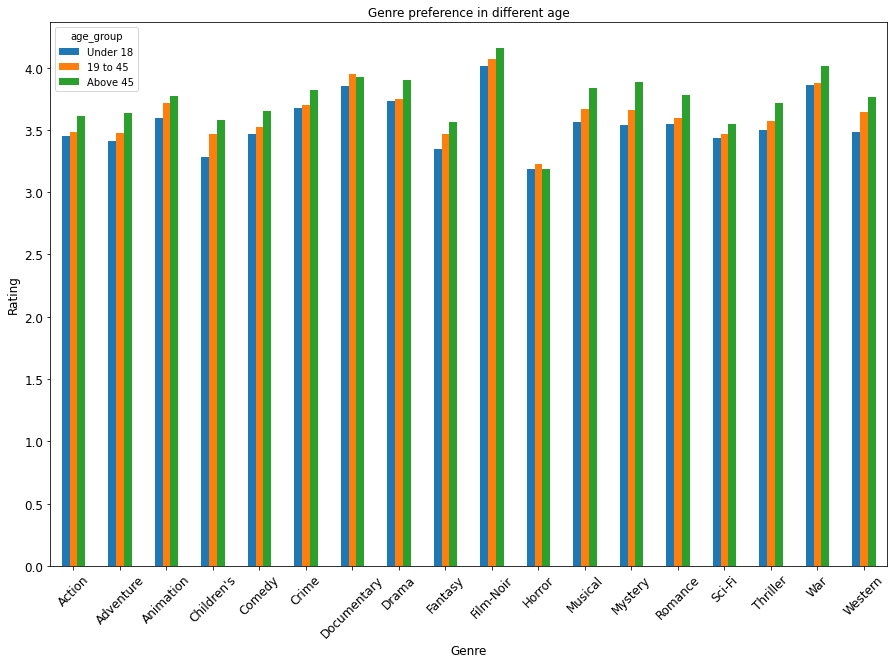

In [68]:
# we can see that the top5 genres in different age groups have slight differences
# Genre Film-Noir, War, Documentary,and Drama exist in all 3 age groups
# let's graph the average genre ratings by age groups
labels = ['Under 18', '19 to 45', 'Above 45']
plt.figure()
x_axis = aged_genres[labels[:6]].plot(kind='bar', title ="Genre preference in different age",figsize=(15,10),legend=True, fontsize=12)
x_axis.set_xlabel("Genre",fontsize=12)
plt.xticks(rotation = 45) 
x_axis.set_ylabel("Rating",fontsize=12)
plt.show()